# Harry Potter

In this notebook we'll do a simple analysis of the harry potter book based on word frequencies.  The purpose of this is to get you more comfotable manipulating text with python and creating simple plots with pandas.



In [1]:
import pandas as pd #data manipulation

In [2]:
with open("dataset/PrisonerOfAzkaban.txt","r") as f:
    text = f.read()



## Counting 

1.) Given the text count:

* The number of sentences 
* The number of words
* The frequncies of every word


You can make some simplifying assumptions to make this easier. Don't worry about case or punctuation. We can assume that the number sentences is equal to the number of full stops.



In [3]:
counts = {}


In [4]:
# %load solutions/count-1.py
def count_chars(text):
    
    l = list(text)
    d = {}
    for char in l:
        if char not in d:
            d[char] = 1
        else:
            d[char] +=1
    return d
    

def count_words(text):
    
    l = text.split()
    d = {}
    for word in l:
        if word not in d:
            d[word] = 1
        else:
            d[word] +=1
            
    return d
    

word_freqs = count_words(text)
n_words = sum(word_freqs.values())
print("Number of Words: ",n_words)
char_freqs = count_chars(text)
n_sents = char_freqs['.']
print("Number of Sentences: ",n_sents)

Number of Words:  106084
Number of Sentences:  9447


In [5]:
sum(word_freqs.values())

106084

Use your above calculations to get:

* The number of times the following characters are mentioned
    * Harry, Ron, Voldemort, Sirius , Vernon and Hermione
* The number of times the following words are mentioned
    * Azkaban, Hogwarts , Gryffindor , Hufflepuff , Ravenclaw amd  Slytherin

In [6]:
people = ['Harry','Ron','Voldemort','Sirius','Vernon','Hermione']


In [7]:
# %load solutions/count-2.py
person_freqs = { person:word_freqs[person] for person in people }
place_freqs = { place:word_freqs[place] for place in places }
person_freqs,place_freqs

NameError: name 'places' is not defined

2.) Create a dataframe from your results, then make a bar plots to show the frequency of each name and place.

In [ ]:
a = [1,2,3]


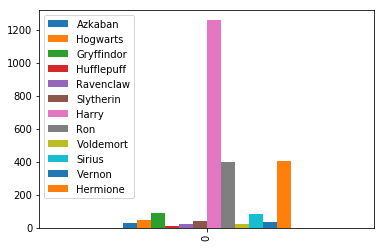

In [ ]:
df = pd.DataFrame()


In [ ]:
df = pd.DataFrame.from_dict( place_freqs,orient='index')


,0
Azkaban,26
Hogwarts,48
Gryffindor,91
Hufflepuff,8
Ravenclaw,22
Slytherin,42


In [ ]:
# %load solutions/harry-2.1.py
df = pd.DataFrame.from_dict( place_freqs,orient='index')
df.columns = ["Place"]
print(df)
df.plot.bar()

In [ ]:
# %load solutions/harry-2.2.py
df = pd.DataFrame.from_dict(person_freqs,orient='index')
df.columns = ["Person"]
print(df)
df.plot.bar()

## Chapters

1.) Split the text into chapters.

```python
chapters = text.split("CHAPTER")
chapters = chapters[1:]

```

For each chapter count:

* The number of sentences 
* The number of words 
* How often each person is mentioned.

In [ ]:
chapters = text.split("CHAPTER")


In [ ]:
# %load solutions/chapters-1.py
chapter_counts = { noun:[] for noun in [*people,*places] }

for chapter in chapters:
    counts = count_words(chapter)
    for noun in chapter_counts.keys():
        chapter_counts[noun].append(counts.get(noun,0))

2.) Create a dataframe to organise your chapter calculations.

In [ ]:
#Should look like this


,Person
Harry,1256
Ron,396
Voldemort,23
Sirius,82
Vernon,34


In [ ]:
# %load solutions/chapters-2.py
df = pd.DataFrame()
df["Chapter"] = list(range(1,len(chapters) + 1))
for key,value in chapter_counts.items():
    df[key] = value

In [ ]:
df.head()

,Chapter,Harry,Ron,Voldemort,Sirius,Vernon,Hermione,Azkaban,Hogwarts,Gryffindor,Hufflepuff,Ravenclaw,Slytherin
0,1,61,13,1,0,8,3,0,10,0,0,0,0
1,2,59,2,0,0,25,0,0,0,0,0,0,0
2,3,63,2,0,4,0,1,6,5,0,0,0,0
3,4,68,21,2,5,0,12,7,4,0,0,0,0
4,5,59,34,0,1,0,39,0,7,4,0,0,0


3.) Create a graph to vizulite how what you calculated changes over the chapters.

In [ ]:
# %load solutions/chapters-3.py
fig,axs = plt.subplots(2,1)
df[people].plot.line(ax=axs[0])
df[places].plot.line(ax=axs[1])

## Bonus

If you complete all of the above questions try these.

1.) How could the assumptions we made in perparing the text effect the outcome of our results?

2.) Modify the code to remove the simplifying assumptions we made at the start?
